# Visión por Computadora
### Integrantes
* Sergio Orellana 221122
* Rodrigo Mansilla 22611
* Ricardo Chuy 221007

## Task 2
Está desarrollando un sistema biométrico de seguridad. El sensor de huellas dactilares está sucio y produce imágenes binarias con dos tipos de defectos:

1. Pequeños puntos blancos en los valles negros de la huella (Ruido Sal)

2. Las “crestas” de la huella tienen pequeñas roturas que impiden que el algoritmo de matching funcione (grietas).

Con esto en mente realice:

1. Cargue la imagen fingerprint_noisy.png. Asegúrese de que sea binaria.

2. Aplique una operación morfológica para eliminar el ruido blanco sin destruir las crestas de la huella. (Seleccione entre Erosión, Dilatación, Apertura o Cierre).

3. Aplique una segunda operación secuencial para conectar las grietas en las crestas de la huella.

4. Muestre la imagen original, la imagen tras el paso 2, y la imagen final.



In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [37]:
def show_img(img, descripcion="normal", figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Imagen {descripcion}')
    plt.xticks([]), plt.yticks([]) 
    plt.axis('off')
    plt.show()

In [38]:
def aplicar_dilatacion(imagen, kernel):
    #print("Dilatacion a mano")

    kernel_size = int(kernel.shape[0])

    alto, ancho = imagen.shape
    pad = kernel_size // 2
    
    
    # Padding con 0 para este caso
    # Si rellenáramos con 255, la imagen se pondría blanca en los bordes
    
    img_padded = np.pad(imagen, pad, mode='constant', constant_values=255)
    
    imagen_dilatada = np.zeros_like(imagen)
    
    #iteramos sobre la imagen pero no el kernel
    for i in range(alto):
        for j in range(ancho):
            ventana = img_padded[i : i + kernel_size, j : j + kernel_size]
            
            # en este caso se usa le maximo, ya que si la imagen es binaria y se toma 
            # el valor mas grande es lo mismo que buscar que al menos 1 es diferente de 0
            val_maximo = np.max(ventana)
            
            imagen_dilatada[i, j] = val_maximo
            
    return imagen_dilatada

In [39]:
def aplicar_erosion(imagen, kernel):
    #print("Erosion a mano")

    kernel_size = int(kernel.shape[0])
    
    # estoes como lo hicimos el lab pasado para el padding
    # la suma entera nos dice que tanto debemos agregar a los bordes para que el kernel
    # no se salga

    alto, ancho = imagen.shape
    pad = kernel_size // 2

    # como es erosion es necesario que el padding sea blanco, para
    # evitar puntos falsos en la imagen
    img_padded = np.pad(imagen, pad, mode='constant', constant_values=255)

    imagen_erosionada = np.zeros_like(imagen)

    # la forma del algoritmo es casi que lo mismo que la convolucion
    # pero con la diferencia de la operacion que hacemos
    # en este caso se busca el minimo. 
    for i in range(alto):
        for j in range(ancho):

            ventana = img_padded[i : i + kernel_size, j : j + kernel_size]

            # se usa el minimo porque logicamente, si el kernel no es completamente del color
            # se tomara el valor mas bajo que encuentre, en este caso 0 porque la imagen es binaria
            # tomar el minimo es lo mismo que decir, al menos 1 no es 255.
            val_minimo = np.min(ventana)

            imagen_erosionada[i, j] = val_minimo

    return imagen_erosionada

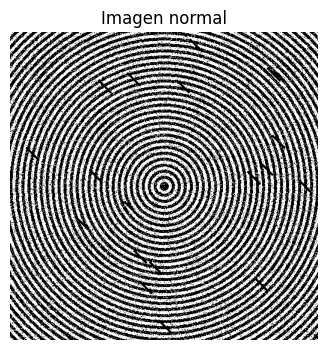

In [40]:
# parte 1
# primero la carga de la imagen normal
try:
    img = cv2.imread('./imgs/fingerprint_noisy.png', cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError
except:
    print("no se encontro la imagen")

show_img(img)

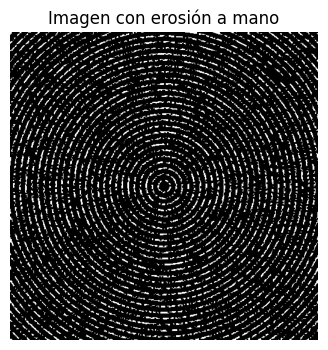

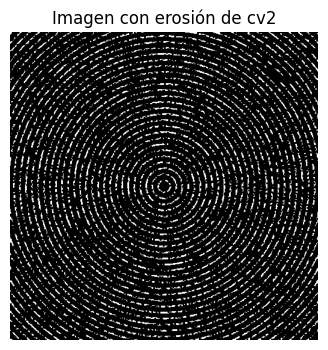

In [41]:
# ahora para poder quitar el ruido blanco, se hace
# la operacion de apertura. Pero como se solicita
# hacer esto en 2 pasos, entonces para demostar
# el funcionamiento es mejor hacer erosion y dilatacion
# lo cual es equivalente a la apertura

kernel = np.ones((3,3) , np.uint8)

img_erosion = aplicar_erosion(img, kernel)
show_img(img_erosion, "con erosión a mano")

# version con cv2
img_erosion2 = cv2.erode(img, kernel, iterations=1)
show_img(img_erosion2, "con erosión de cv2")


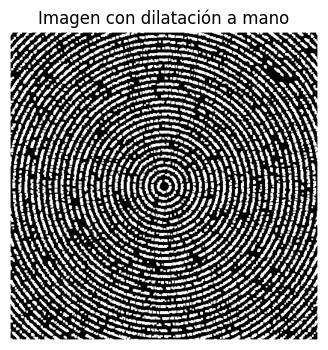

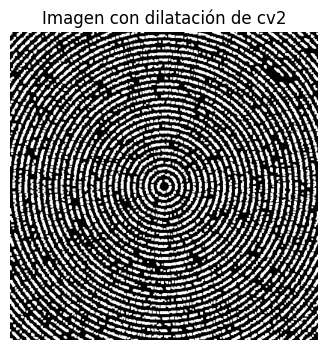

In [42]:
img_dilatacion = aplicar_dilatacion(img_erosion, kernel)
show_img(img_dilatacion, "con dilatación a mano")

# version con cv2
img_dilatacion2 = cv2.dilate(img_erosion2, kernel, iterations=1)
show_img(img_dilatacion2, "con dilatación de cv2")

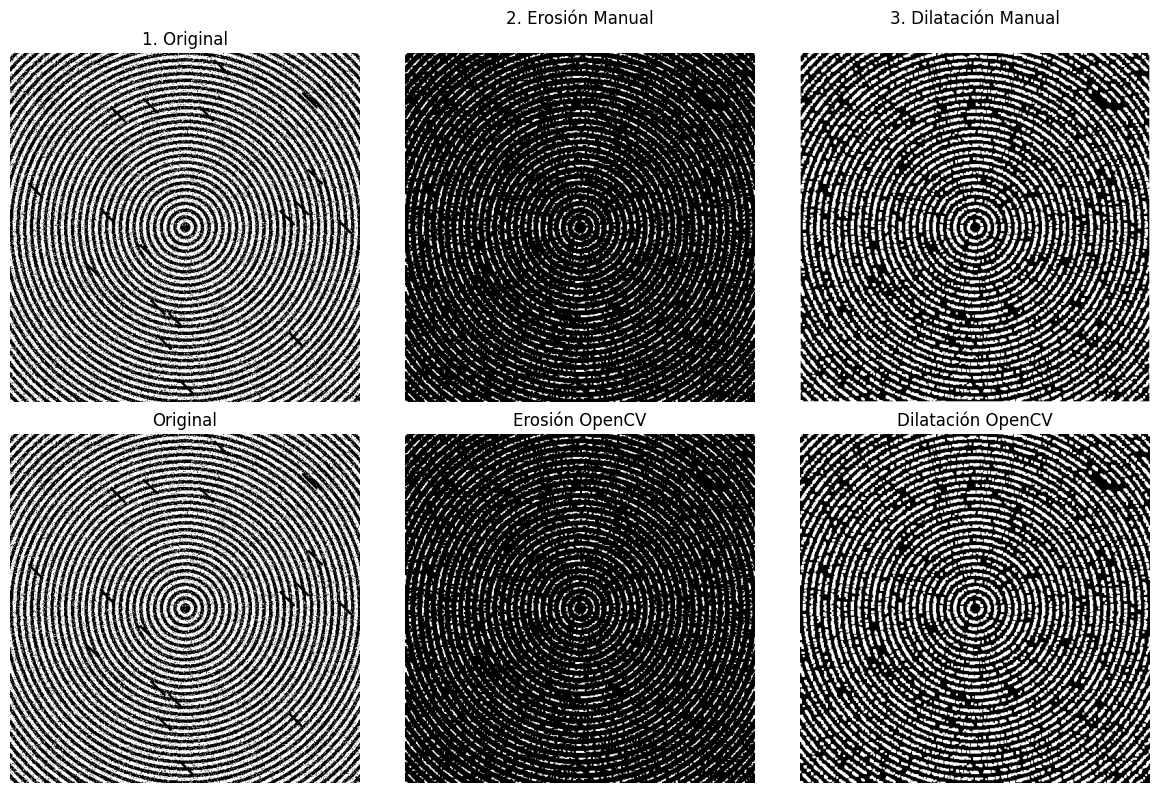

In [43]:
# comparasion

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Fila 1: Manual
axes[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("1. Original")

axes[0, 1].imshow(img_erosion, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title("2. Erosión Manual\n")

axes[0, 2].imshow(img_dilatacion, cmap='gray', vmin=0, vmax=255)
axes[0, 2].set_title("3. Dilatación Manual\n")

# Fila 2: OpenCV
axes[1, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title("Original")

axes[1, 1].imshow(img_erosion2, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title("Erosión OpenCV")

axes[1, 2].imshow(img_dilatacion2, cmap='gray', vmin=0, vmax=255)
axes[1, 2].set_title("Dilatación OpenCV")

# Quitar ejes para limpiar
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

# Analisis

Con esto se puede ver que la implementación a mano funciona igual que la de opencv, pero la de opncv tiene una diferencia importante y es que se puede realizar más de una vez dicha operación. Por lo que a continuación se prueba con distintas operaciones para la limpieza de la imagen.

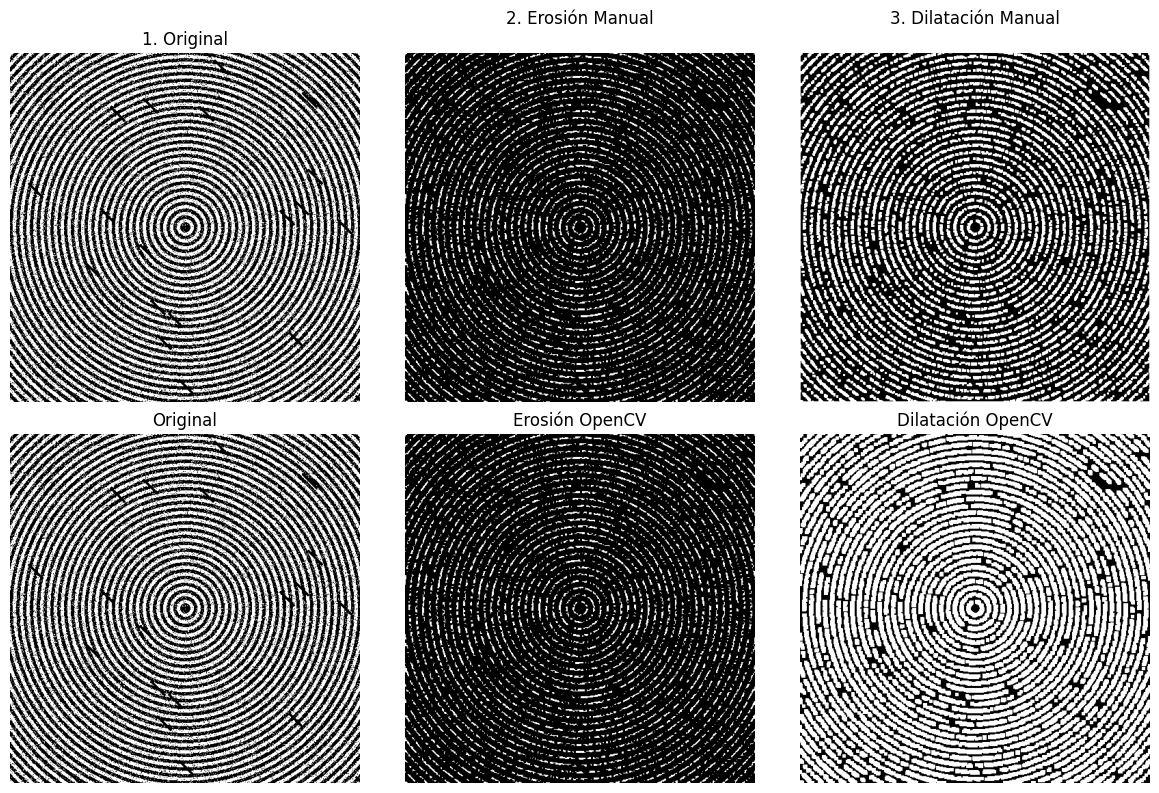

In [44]:
kernel2 = np.ones((3,3) , np.uint8)

# version con cv2
img_erosion3 = cv2.erode(img, kernel2, iterations=1)

# version con cv2
img_dilatacion3 = cv2.dilate(img_erosion3, kernel2, iterations=2)

# comparasion
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Fila 1: Manual
axes[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("1. Original")

axes[0, 1].imshow(img_erosion, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title("2. Erosión Manual\n")

axes[0, 2].imshow(img_dilatacion, cmap='gray', vmin=0, vmax=255)
axes[0, 2].set_title("3. Dilatación Manual\n")

# Fila 2: OpenCV
axes[1, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title("Original")

axes[1, 1].imshow(img_erosion3, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title("Erosión OpenCV")

axes[1, 2].imshow(img_dilatacion3, cmap='gray', vmin=0, vmax=255)
axes[1, 2].set_title("Dilatación OpenCV")

# Quitar ejes para limpiar
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

Para esta parte se espera que su entregable muestre:

* Selección correcta de los Elementos Estructurantes (Forma y Tamaño) para cada paso.

* Calidad visual de la imagen final (sin ruido y continua)

* Responda: ¿El orden de los factores altera el producto? Explique qué hubiera pasado si hubiera aplicado las operaciones en orden inverso y demuéstrelo con un ejemplo visual en el notebook.

In [45]:
# parte 2, lo mismo pero inverso jej
img_dilatacion = aplicar_dilatacion(img, kernel)
#show_img(img_dilatacion, "con dilatación a mano")
img_erosion = aplicar_erosion(img_dilatacion, kernel)
#show_img(img_erosion, "con erosión a mano")

# version con cv2
img_dilatacion2 = cv2.dilate(img, kernel, iterations=1)
#show_img(img_dilatacion2, "con dilatación de cv2")

# version con cv2
img_erosion2 = cv2.erode(img_dilatacion2, kernel, iterations=1)
#show_img(img_erosion2, "con erosión de cv2")

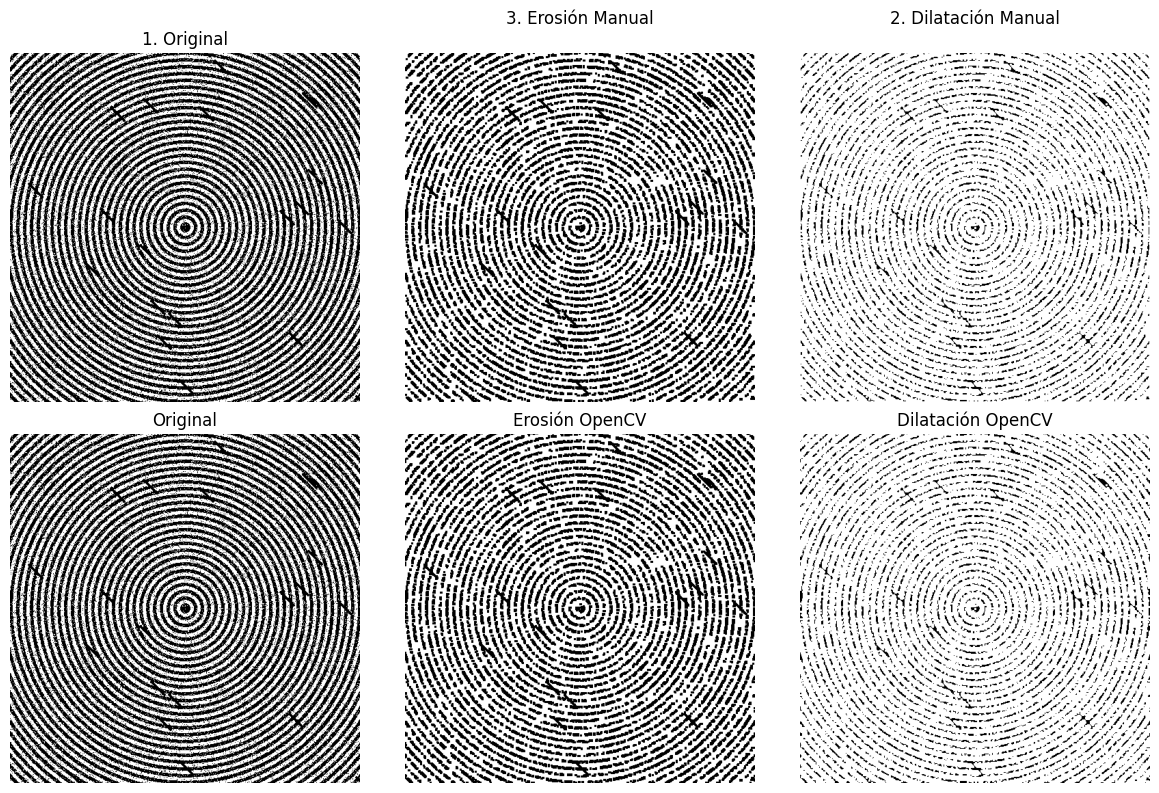

In [46]:
# comparasion

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Fila 1: Manual
axes[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("1. Original")

axes[0, 2].imshow(img_dilatacion, cmap='gray', vmin=0, vmax=255)
axes[0, 2].set_title("2. Dilatación Manual\n")

axes[0, 1].imshow(img_erosion, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title("3. Erosión Manual\n")


# Fila 2: OpenCV
axes[1, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title("Original")

axes[1, 2].imshow(img_dilatacion2, cmap='gray', vmin=0, vmax=255)
axes[1, 2].set_title("Dilatación OpenCV")

axes[1, 1].imshow(img_erosion2, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title("Erosión OpenCV")


# Quitar ejes para limpiar
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

# ¿Es lo mismo en diferente orden?

Como se puede ver en las imagenes el resultado no es el mismo. Esto pasa porque al hacer erosión y luego dilatación esto es equivalente a la operación de Apertura. Pero en el caso de hacer dilatación y luego erosión se realiza el procedimiento de cierre. El ruido que se elimina es diferente dependiendo del orden de las operaciones. 

# Referencias

* R, A. (2023, 29 junio). Erosion and Dilation in Image Processing - Scaler Topics. Scaler Topics. https://www.scaler.com/topics/erosion-and-dilation-in-image-processing

* Xu, P. (2019, 14 agosto). Mathematical morphology visualized. Github. Recuperado 29 de enero de 2026, de https://penny-xu.github.io/blog/mathematical-morphology